In [12]:
#pip install imutils

  Created wheel for imutils: filename=imutils-0.5.3-cp37-none-any.whl size=25850 sha256=50224bc7e397b63494488e1e11a6ad8c7d65cf15124d367e023b60e9a2551d17
  Stored in directory: /Users/vishalsingh/Library/Caches/pip/wheels/16/84/1f/bf88641293cda2c8be81a5c4b8ca973dd9125a6dc3767417fd
Successfully built imutils
Note: you may need to restart the kernel to use updated packages.


In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
import cv2
import imutils
import numpy as np
import matplotlib.pyplot as plt
import time
from os import listdir

%matplotlib inline

In [2]:
def crop_brain_contour(image, plot=False):
    
    #import imutils
    #import cv2
    #from matplotlib import pyplot as plt
    
    # Convert the image to grayscale, and blur it slightly
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (5, 5), 0)

    # Threshold the image, then perform a series of erosions +
    # dilations to remove any small regions of noise
    thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
    thresh = cv2.erode(thresh, None, iterations=2)
    thresh = cv2.dilate(thresh, None, iterations=2)

    # Find contours in thresholded image, then grab the largest one
    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key=cv2.contourArea)
    

    # Find the extreme points
    extLeft = tuple(c[c[:, :, 0].argmin()][0])
    extRight = tuple(c[c[:, :, 0].argmax()][0])
    extTop = tuple(c[c[:, :, 1].argmin()][0])
    extBot = tuple(c[c[:, :, 1].argmax()][0])
    
    # crop new image out of the original image using the four extreme points (left, right, top, bottom)
    new_image = image[extTop[1]:extBot[1], extLeft[0]:extRight[0]]            

    if plot:
        plt.figure()

        plt.subplot(1, 2, 1)
        plt.imshow(image)
        
        plt.tick_params(axis='both', which='both', 
                        top=False, bottom=False, left=False, right=False,
                        labelbottom=False, labeltop=False, labelleft=False, labelright=False)
        
        plt.title('Original Image')
            
        plt.subplot(1, 2, 2)
        plt.imshow(new_image)

        plt.tick_params(axis='both', which='both', 
                        top=False, bottom=False, left=False, right=False,
                        labelbottom=False, labeltop=False, labelleft=False, labelright=False)

        plt.title('Cropped Image')
        
        plt.show()
    
    return new_image

In [3]:
img = cv2.imread('/Users/vishalsingh/Desktop/Data/ML/ProjectCV/skin-cancer-malignant-vs-benign/test/benign/1.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

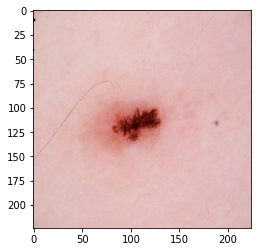

In [4]:
plt.imshow(img)

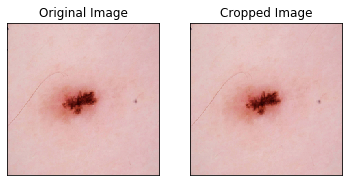

In [5]:
new_img = crop_brain_contour(img,True)

In [59]:
def load_data(dir_list, image_size):
    """
    Read images, resize and normalize them. 
    Arguments:
        dir_list: list of strings representing file directories.
    Returns:
        X: A numpy array with shape = (#_examples, image_width, image_height, #_channels)
        y: A numpy array with shape = (#_examples, 1)
    """

    # load all images in a directory
    X = []
    y = []
    image_width, image_height = image_size
    
    for directory in dir_list:
        for filename in listdir(directory):
            # load the image
            image = image = cv2.imread(directory + filename)
            # crop the brain and ignore the unnecessary rest part of the image
            image = crop_brain_contour(image, plot=False)
            # resize image
            image = cv2.resize(image, dsize=(image_width, image_height), interpolation=cv2.INTER_CUBIC)
            # normalize values
            image = image / 255.
            # convert image to numpy array and append it to X
            X.append(image)
            # append a value of 1 to the target array if the image
            # is in the folder named 'yes', otherwise append 0.
            if directory[-7:] == 'benign/':
                y.append([1])
            else:
                y.append([0])
                
    X = np.array(X)
    y = np.array(y)
    
    # Shuffle the data
    X, y = shuffle(X, y)
    
    print(f'Number of examples is: {len(X)}')
    print(f'X shape is: {X.shape}')
    print(f'y shape is: {y.shape}')
    
    return X, y

In [60]:
augmented_path = '/Users/vishalsingh/Desktop/Data/ML/ProjectCV/skin-cancer-malignant-vs-benign/test/'

# augmented data (yes and no) contains both the original and the new generated examples
augmented_yes = augmented_path + 'benign/' 
augmented_no = augmented_path + 'malignant/'



In [61]:
#augmented_yes

In [62]:
IMG_WIDTH, IMG_HEIGHT = (240, 240)
X, y = load_data([augmented_yes, augmented_no], (IMG_WIDTH, IMG_HEIGHT))

Number of examples is: 660
X shape is: (660, 240, 240, 3)
y shape is: (660, 1)


In [63]:
y

array([[1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
    

In [58]:
dir_list = [augmented_yes,augmented_no]

for directory in dir_list:
    
        
    for filename in listdir(directory):
            
            image = cv2.imread(directory + filename)
            
            print (directory[-7:])
            
            

benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
benign/
